In [1]:
import pandas as pd
import numpy as np

In [2]:
#Загрузчик с диска гугл
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
with open('../content/drive/MyDrive/Colab Notebooks/NLP/4/question.json', 'r') as f:
    question = json.load(f)


In [5]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
! pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 8.2 MB 11.5 MB/s 


In [8]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [10]:
import re
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]

stopwords_list = nltk.corpus.stopwords.words('russian')

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [12]:
print(preprocess(question[1]))

['магазин', 'tobacco', 'адрес', 'уфа', 'улица', 'революционный', 'некоторый', 'магазин', 'сеть', 'происходить', 'незаконный', 'продажа', 'снюс', 'делаться', 'это', 'прилавок', 'акцизный', 'товар', 'покупатель', 'просить', 'крепкий', 'снюс', 'акциз', 'который', 'соответствовать', 'качество', 'запретить', 'продавец', 'вытаскивать', 'предлагать', 'пример', 'покупатель', 'попросить', 'снюс', 'бруталый', 'вкусовой', 'снюс', 'продавец', 'достать', 'акцизный', 'наклейка', 'разобраться', 'пожалуйста', 'травить', 'человек', 'подросток']


In [13]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 73.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [14]:
from gensim.models import *
from gensim import corpora

In [15]:
preprocessed_text = list(tqdm(map(preprocess, question), total=len(question)))

  0%|          | 0/2495 [00:00<?, ?it/s]

In [16]:
dictionary = corpora.Dictionary(preprocessed_text)

dictionary.filter_extremes(no_below = 10, no_above = 0.9, keep_n=None) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('quest.dict')

In [17]:
corpus = [dictionary.doc2bow(text) for text in preprocessed_text]
corpora.MmCorpus.serialize('quest.model', corpus)

In [18]:
lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, chunksize=50, update_every=1, passes=2)

In [19]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(6,
  '0.158*"товар" + 0.121*"магазин" + 0.071*"продавец" + 0.025*"купить" + 0.024*"вернуть" + 0.024*"покупка" + 0.022*"пункт" + 0.019*"день" + 0.017*"чек" + 0.016*"выдача"'),
 (16,
  '0.271*"данные" + 0.171*"врач" + 0.124*"проводить" + 0.076*"нормативный" + 0.055*"процедура" + 0.054*"проводиться" + 0.029*"клиника" + 0.027*"руководствоваться" + 0.009*"здравствуйте" + 0.000*"кабинет"'),
 (4,
  '0.058*"это" + 0.047*"сказать" + 0.037*"день" + 0.034*"мочь" + 0.029*"всё" + 0.022*"сделать" + 0.021*"делать" + 0.020*"месяц" + 0.020*"позвонить" + 0.020*"вопрос"'),
 (14,
  '0.105*"правило" + 0.101*"петербург" + 0.098*"санкт" + 0.098*"санитарный" + 0.065*"норма" + 0.060*"жилой" + 0.038*"шум" + 0.037*"просить" + 0.037*"вечер" + 0.032*"город"'),
 (3,
  '0.131*"дом" + 0.049*"квартира" + 0.047*"вода" + 0.044*"адрес" + 0.041*"наш" + 0.037*"ремонт" + 0.029*"проживать" + 0.029*"жилец" + 0.028*"год" + 0.026*"видео"'),
 (7,
  '0.047*"возврат" + 0.039*"средство" + 0.029*"день" + 0.022*"денежный" + 0.021*"

In [20]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=bd8c437aa9ccd919a08df3d8327a19e608a60c6eada4486adcb9ab78cccec7f6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [22]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [23]:
%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


CPU times: user 825 ms, sys: 55.6 ms, total: 881 ms
Wall time: 2.97 s


In [24]:
print(lda.log_perplexity(corpus))

-12.738352197711063


In [25]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

Персплексия:  2.9365751111053713e-06


In [28]:
coherence_model_lda = CoherenceModel(model=lda, texts=preprocessed_text, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

Средняя когерентность:  0.36303712761398865


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

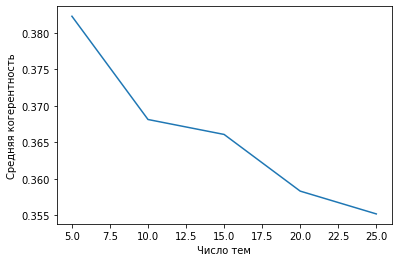

In [30]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in topics_list:
    lda = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(CoherenceModel(model=lda, texts=preprocessed_text, dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()

In [31]:
lda_15 = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, chunksize=50, update_every=1, passes=2)
vis_data = gensimvis.prepare(lda_15, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
